# Panda cookbook 6

In [418]:
import numpy as np

In [423]:
data_path = '/Volumes/MacHD/Users/alstof/pandas-cookbook/data/weather_2012.csv'
weather_2012 = pd.read_csv(data_path, parse_dates=True, index_col='Date/Time')

In [502]:
#show only top 10 strings
#pd.Series(weather_2012['Weather']).value_counts().index[:10]

Index(['Mainly Clear', 'Mostly Cloudy', 'Cloudy', 'Clear', 'Snow', 'Rain',
       'Rain Showers', 'Fog', 'Rain,Fog', 'Drizzle,Fog'],
      dtype='object')

In [496]:
#weather_2012[:5]
weather_top_conditions = pd.Series(weather_2012['Weather']).value_counts()>50
#weather_top_conditions[weather_top_conditions]
#weather_top_conditions

In [495]:
#weather_2012['Weather'].str.contains('Snow').astype(float).resample('M', how=np.mean).plot(kind='bar')

In [494]:
#weather_2012['Temp (C)'].resample('M', how=np.median).plot(kind='bar')

In [488]:
temperature_2012 = weather_2012['Temp (C)'].resample('M', how=np.median)
snow_2012 = weather_2012['Weather'].str.contains('Snow').astype(float).resample('M', how=np.mean)
temperature_2012.name = 'Temperature'
snow_2012.name = 'Snow'
stats = pd.concat([temperature_2012, snow_2012], axis=1)

In [498]:
#stats

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1400ee4a8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1440af710>], dtype=object)

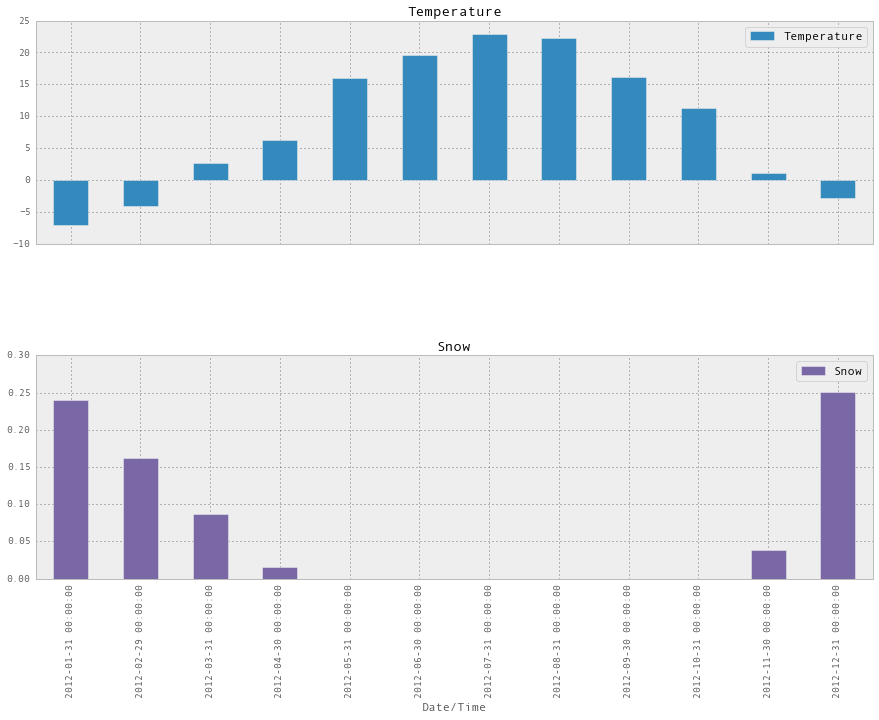

In [493]:
stats.plot(subplots=True, kind='bar', figsize=[15,10])

#Return to Statistical analysis with python

In [4]:
vessel_data = pd.read_csv('statistical-analysis-python-tutorial/data/AIS/vessel_information.csv')

In [5]:
#vessel_data.mmsi.count()
vessel_data.head(5)

,mmsi,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
0,1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing
1,9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62,2,Pleasure/Tug
2,21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208,1,Unknown
3,74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155,1,Unknown
4,103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155,2,Tanker/Unknown


In [6]:

vessel_data.index = vessel_data['mmsi']

In [7]:
vessels5 = vessel_data[vessel_data.type.apply(lambda t: t in vessel_data.type.value_counts().index[:5])]

In [9]:
pd.get_dummies(vessels5.type).head(5)

,Cargo,Pleasure,Sailing,Tanker,Tug
mmsi,,,,,
15151,0,0,0,0,1
80404,0,1,0,0,0
366235,1,0,0,0,0
587370,0,0,0,0,1
693559,0,0,0,0,1


In [25]:
np.random.permutation([2, 4, 6, 8, 10, 12, 14])

array([14,  8,  6,  4, 12,  2, 10])

In [27]:
np.take?

# Let's look at Seattle historical weather data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = [15,5]
%matplotlib inline

In [146]:
path_to_data = '/Users/alstof/Downloads/Green Card/Weather in Seattle/601146.csv'
#path_to_data = '/Users/alstof/Downloads/Green Card/Weather in Seattle/601277.csv'

In [147]:
weather_data = pd.read_csv(path_to_data, na_values=[-9999,9999,' '], index_col='DATE', parse_dates=['DATE'], dayfirst=True)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,9,10,11,14,15,16,19,21,24,26,31,36,40,41,45,46,51,55,56,61,66,71,76,79,81,86,90,91,96,99,101,106,111,116,120,121,126,131,136,141,146,151,156,161,166,171,176,181,186,191,196,201,206,211,216,221,226,231) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [148]:
weather_data.drop(weather_data.columns[weather_data.columns.str.contains('Flag')], axis=1, inplace=True)
weather_data.drop(weather_data.columns[weather_data.columns.str.contains('Time of Observation')], axis=1, inplace=True)
weather_data.drop(weather_data.count()[weather_data.count()<7000].index, axis=1, inplace=True)
# Прежде зачистки конкретных столбцов нужно оценить их наполнение
#weather_data.drop(['SNOW','ACMH','WSFM','WDFG','WDFM','WSFG','PGTM','WSFG','FMTM'], axis=1, inplace=True)

In [149]:
weather_data.TMAX = weather_data.TMAX.apply(lambda t: round(t/10))
weather_data.TMIN = weather_data.TMIN.apply(lambda t: round(t/10))
weather_data.PRCP = weather_data.PRCP.apply(lambda t: round(t/10))
weather_data.AWND = weather_data.AWND.apply(lambda t: round(t/10)) 
weather_data.WSF2 = weather_data.WSF2.apply(lambda t: round(t/10)) 

In [150]:
#weather_data.describe()
#weather_data.TSUN[weather_data.TSUN.replace(0, np.NAN).fillna(9999) != 9999]
#weather_data.AWND
weather_data.head(3)

,STATION,STATION_NAME,PRCP,SNWD,SNOW,ACMH,ACSH,TSUN,TMAX,TMIN,...,WDF2,WDFG,WSF2,WDFM,WSFM,PGTM,WSFG,FMTM,WT01,WT16
DATE,,,,,,,,,,,,,,,,,,,,,
1948-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,12,0,0,NaN,NaN,NaN,11,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1948-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,15,0,0,NaN,NaN,NaN,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1948-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,11,0,0,NaN,NaN,NaN,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [11]:
weather_data.ACSH.resample?

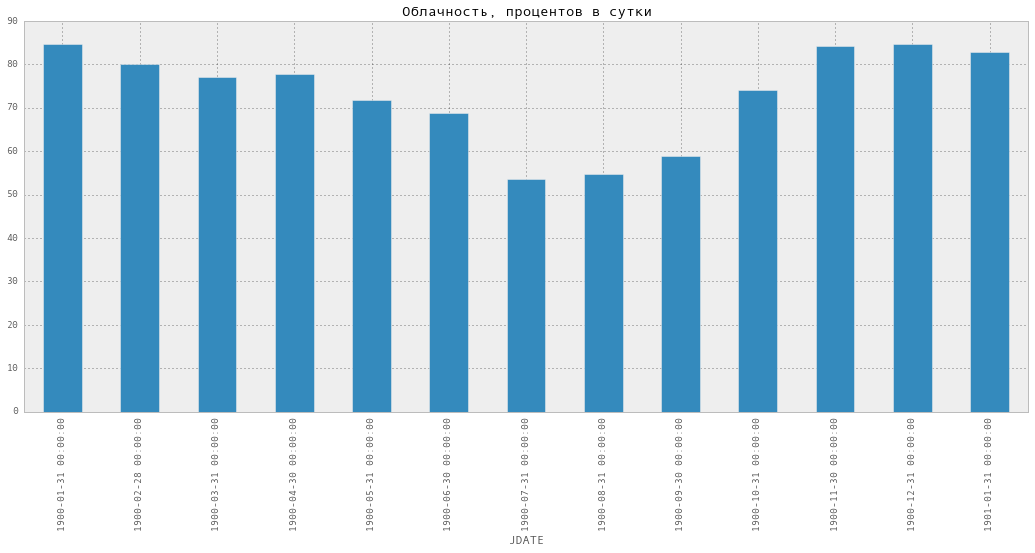

In [157]:
w2d = weather_data.ACSH[weather_data.ACSH.fillna(9999) != 9999].resample('M', how=np.mean)
w2d.plot(kind='bar', figsize=[18,7], title = 'Облачность, процентов в сутки')

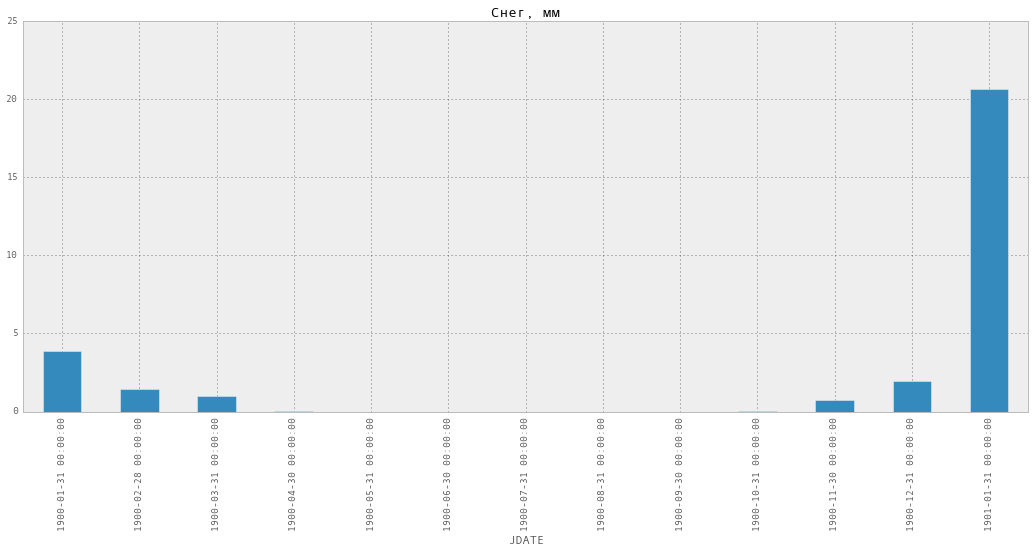

In [158]:
w2d = weather_data.SNOW[weather_data.SNOW.fillna(9999) != 9999].resample('M', how=np.mean)
w2d.plot(kind='bar', figsize=[18,7], title = 'Снег, мм')

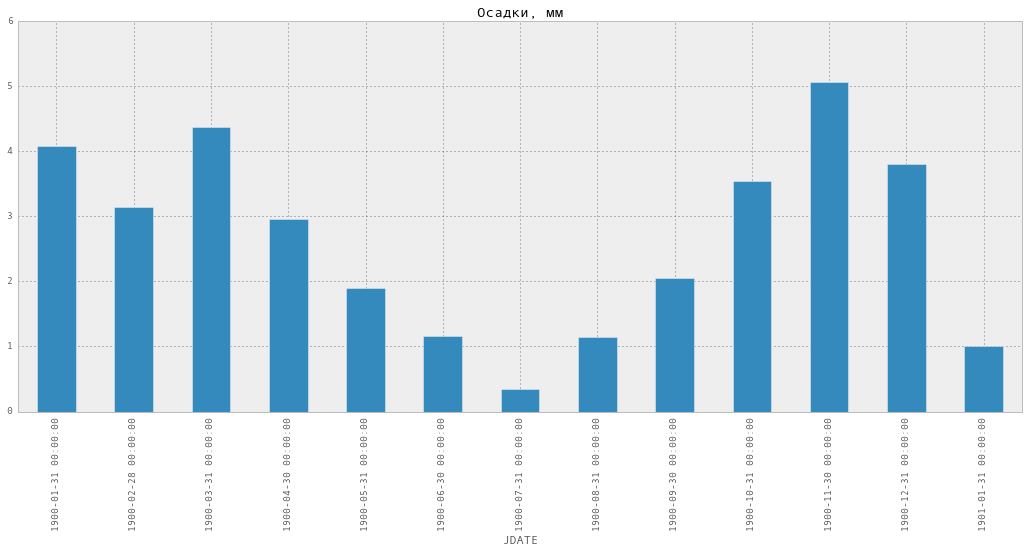

In [149]:
w2d = weather_data.PRCP[weather_data.PRCP.fillna(9999) != 9999][22000:].resample('M', how=np.mean)
w2d.plot(kind='bar', figsize=[18,7], title = 'Осадки, мм')

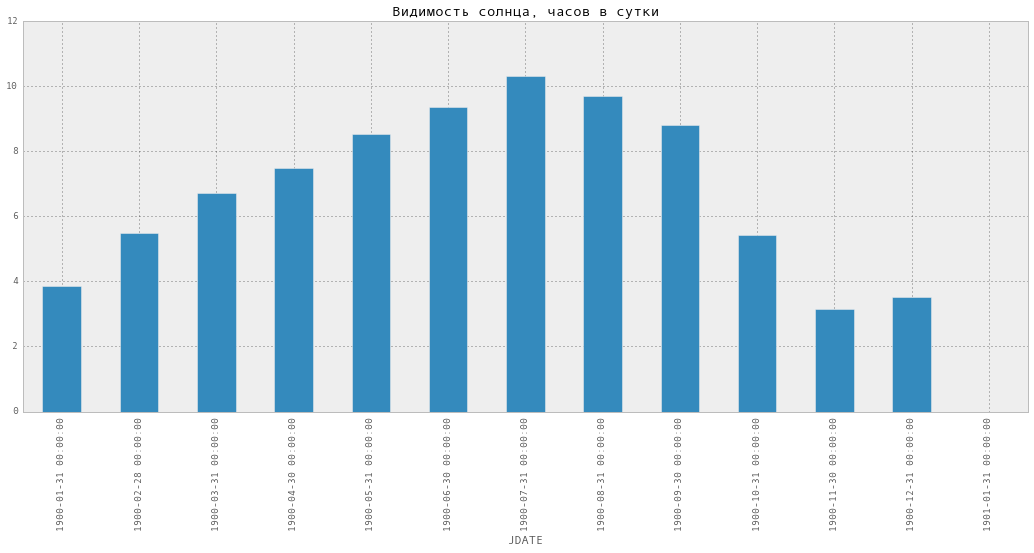

In [150]:
w2d = weather_data.TSUN[weather_data.TSUN.replace(0, np.NAN).fillna(9999) != 9999].apply(lambda t: round(t/60))\
        [7000:].resample('M', how=np.mean)
w2d.plot(kind='bar', figsize=[18,7], title = 'Видимость солнца, часов в сутки')

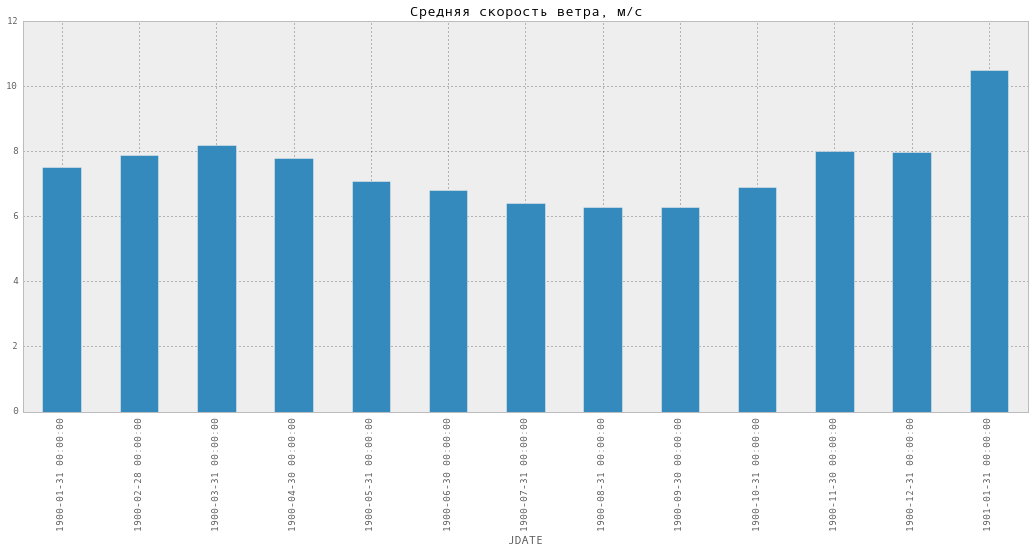

In [151]:
w2d = weather_data.WSF2[weather_data.WSF2.replace(0, np.NAN).fillna(9999) != 9999][4000:].resample('M', how=np.mean)
w2d.plot(kind='bar', figsize=[18,7], title = 'Средняя скорость ветра, м/с')

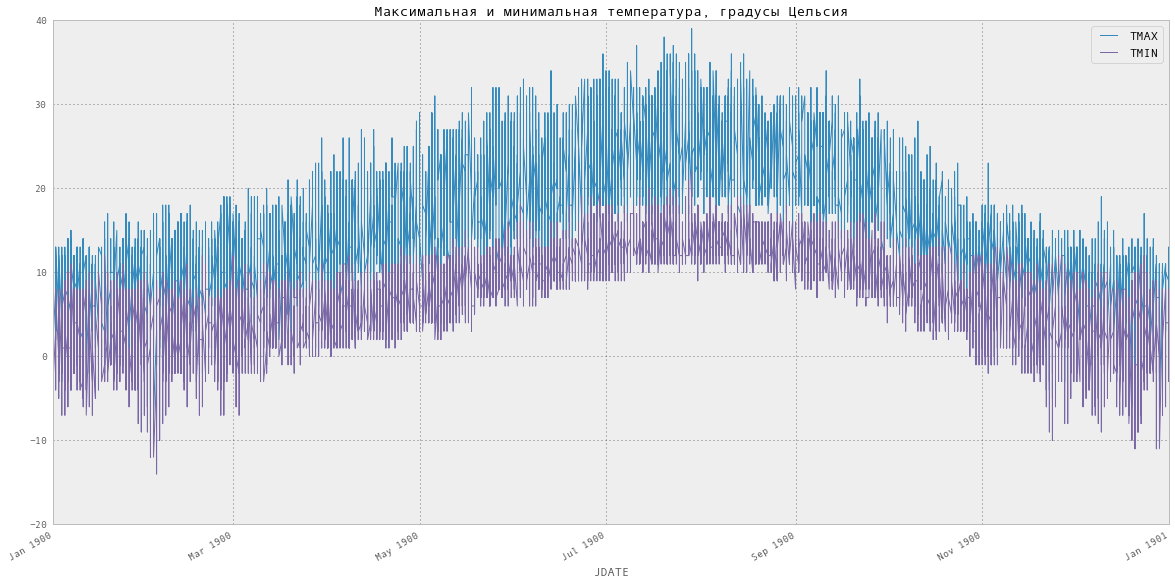

In [155]:
weather_data[['TMAX','TMIN']][15000:].plot(figsize=[20,10], title = 'Максимальная и минимальная температура, градусы Цельсия')

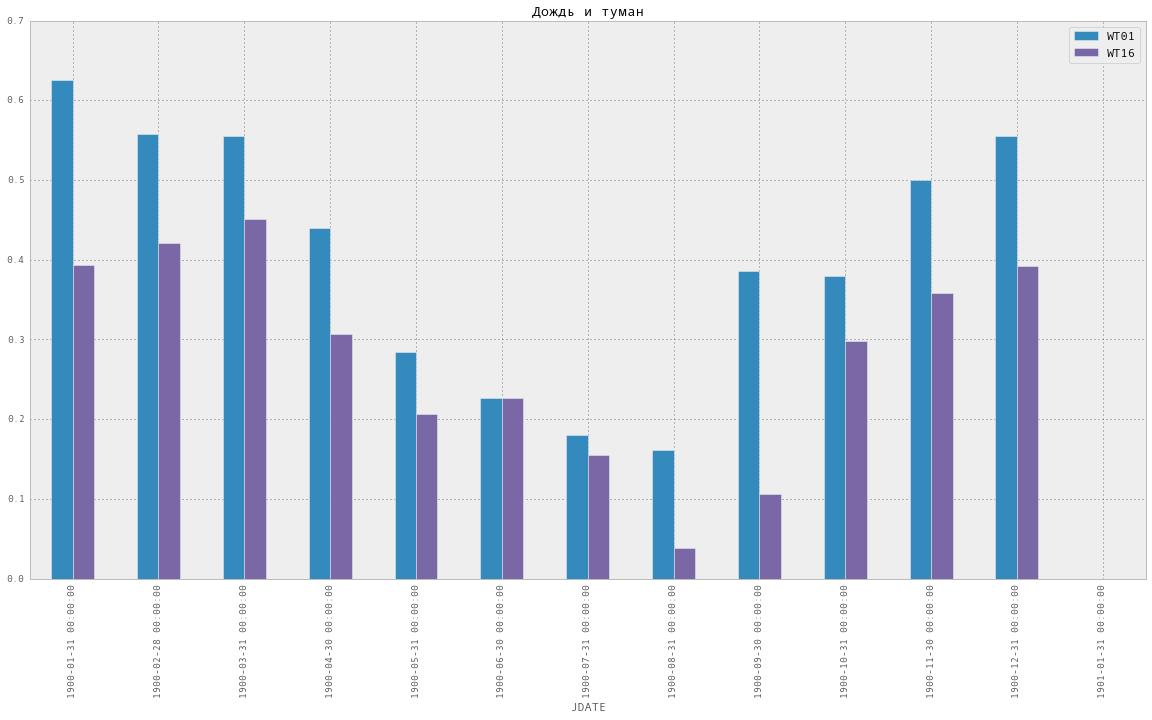

In [147]:
w2d = weather_data[['WT01','WT16']][23000:].fillna(0).resample('M', how = np.mean)
w2d.plot(kind = 'bar', figsize=[20,10], title = 'Дождь и туман')

In [151]:
weather_data.loc[:,'JDAY'] = weather_data.index.dayofyear
weather_data.loc[:,'JDATE'] = weather_data.JDAY.astype(str).apply(lambda t: datetime.strptime(t , '%j'))
weather_data.index = weather_data.JDATE

In [140]:
w_grouped_jday = weather_data.fillna(0).groupby('JDATE').aggregate(np.mean)

In [153]:
#w_grouped_jday.resample('M', how = np.mean).plot(subplots=True, kind = 'bar', figsize=[15,50],)

In [156]:
# there are a lot of leap years in data, so we need to make day 366 just another day among others.
weather_data['JDAY'][weather_data['JDAY'] == 366] = weather_data['JDAY'][weather_data['JDAY'] == 366].apply(lambda t: t-1)

SyntaxError: can't assign to comparison (<ipython-input-156-0b4d8e480d64>, line 2)

#Try ulmo as source of weather data

In [4]:
import ulmo
import pandas as pd
import numpy as np

In [5]:
#ulmo.ncdc.ghcn_daily.get_stations(country='US', state='PA')

In [6]:
weather_seattle = pd.DataFrame(ulmo.ncdc.ghcn_daily.get_data('USW00024233', elements = ['TMAX','TMIN','PRCP','SNOW']))
#weather_sanfrancisco = pd.DataFrame(ulmo.ncdc.ghcn_daily.get_data('USW00023234', elements = ['TMAX','TMIN','PRCP','SNOW','ACSH']))
#weather_raleigh = pd.DataFrame(ulmo.ncdc.ghcn_daily.get_data('USW00013722', elements = ['TMAX','TMIN','PRCP','SNOW','ACSH']))
#weather_philadelphia = pd.DataFrame(ulmo.ncdc.ghcn_daily.get_data('USW00013739', elements = ['TMAX','TMIN','PRCP','SNOW','ACSH']))

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ulmo/ncdc/ghcn_daily/core.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)


In [22]:
#weather_seattle['TMAX'][0]['value']
weather_philadelphia.tail(10)
#weather_seattle['ACSH'][weather_seattle['ACSH'].notnull()]

,ACSH,PRCP,SNOW,TMAX,TMIN
2015-09-21,NaN,"{'mflag': 'T', 'sflag': 'W', 'value': 0.0, 'qf...","{'mflag': None, 'sflag': 'W', 'value': 0.0, 'q...","{'mflag': None, 'sflag': 'W', 'value': 233.0, ...","{'mflag': None, 'sflag': 'W', 'value': 156.0, ..."
2015-09-22,NaN,"{'mflag': None, 'sflag': 'W', 'value': 0.0, 'q...","{'mflag': None, 'sflag': 'W', 'value': 0.0, 'q...","{'mflag': None, 'sflag': 'W', 'value': 239.0, ...","{'mflag': None, 'sflag': 'W', 'value': 172.0, ..."
2015-09-23,NaN,"{'mflag': None, 'sflag': 'W', 'value': 0.0, 'q...","{'mflag': None, 'sflag': 'W', 'value': 0.0, 'q...","{'mflag': None, 'sflag': 'W', 'value': 267.0, ...","{'mflag': None, 'sflag': 'W', 'value': 150.0, ..."
2015-09-24,NaN,"{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '..."
2015-09-25,NaN,"{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '..."
2015-09-26,NaN,"{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '..."
2015-09-27,NaN,"{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '..."
2015-09-28,NaN,"{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '..."
2015-09-29,NaN,"{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '..."
2015-09-30,NaN,"{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '...","{'mflag': None, 'sflag': None, 'value': nan, '..."


In [23]:
#weather_seattle.head(4)['TMAX'].apply(lambda c: c['value'])
#weather_seattle['SNOW'].apply(lambda c: c['value'])
weather_seattle.fillna(value='0', inplace = True)

In [25]:
weather_seattle['TMAX'] = weather_seattle['TMAX'].apply(lambda c: c['value']/10)
weather_seattle['PRCP'] = weather_seattle['PRCP'].apply(lambda c: c['value']/10)
weather_seattle['SNOW'] = weather_seattle['SNOW'].apply(lambda c: c['value'])
weather_seattle['TMIN'] = weather_seattle['TMIN'].apply(lambda c: c['value']/10)
#weather_seattle['ACSH'] = weather_seattle['ACSH'].apply(lambda c: c['value'])

TypeError: 'float' object is not subscriptable

In [ ]:
weather_sanfrancisco['TMAX'] = weather_sanfrancisco['TMAX'].apply(lambda c: c['value']/10)
weather_sanfrancisco['PRCP'] = weather_sanfrancisco['PRCP'].apply(lambda c: c['value']/10)
weather_sanfrancisco['SNOW'] = weather_sanfrancisco['SNOW'].apply(lambda c: c['value'])
weather_sanfrancisco['TMIN'] = weather_sanfrancisco['TMIN'].apply(lambda c: c['value']/10)
weather_sanfrancisco['ACSH'] = weather_sanfrancisco['ACSH'].apply(lambda c: c['value'])

In [20]:
weather_raleigh['TMAX'] = weather_raleigh['TMAX'].apply(lambda c: c['value']/10)
weather_raleigh['PRCP'] = weather_raleigh['PRCP'].apply(lambda c: c['value']/10)
weather_raleigh['SNOW'] = weather_raleigh['SNOW'].apply(lambda c: c['value'])
weather_raleigh['TMIN'] = weather_raleigh['TMIN'].apply(lambda c: c['value']/10)
weather_raleigh['ACSH'] = weather_raleigh['ACSH'].apply(lambda c: c['value'])

TypeError: 'float' object is not subscriptable

In [132]:
weather_philadelphia['TMAX'] = weather_philadelphia['TMAX'].apply(lambda c: c['value']/10)
weather_philadelphia['PRCP'] = weather_philadelphia['PRCP'].apply(lambda c: c['value']/10)
weather_philadelphia['SNOW'] = weather_philadelphia['SNOW'].apply(lambda c: c['value'])
weather_philadelphia['TMIN'] = weather_philadelphia['TMIN'].apply(lambda c: c['value']/10)
weather_philadelphia['ACSH'] = weather_philadelphia['ACSH'].apply(lambda c: c['value'])

In [173]:
weather_seattle.index = pd.to_datetime(weather_seattle.index, '%Y-%m-%d')
weather_seattle.loc[:,'JDAY'] = weather_seattle.index.dayofyear
weather_seattle.loc[:,'JDATE'] = weather_seattle.JDAY.astype(str).apply(lambda t: datetime.strptime(t , '%j'))
weather_seattle.index = weather_seattle.JDATE

In [180]:
weather_sanfrancisco.index = pd.to_datetime(weather_sanfrancisco.index, '%Y-%m-%d')
weather_sanfrancisco.loc[:,'JDAY'] = weather_sanfrancisco.index.dayofyear

In [183]:
weather_sanfrancisco.fillna('0').tail(2000)

,PRCP,SNOW,TMAX,TMIN,JDAY
2010-04-10,0,0,150,117,100
2010-04-11,23.4,0,133,94,101
2010-04-12,13.7,0,150,94,102
2010-04-13,0,0,156,100,103
2010-04-14,0,0,156,89,104
2010-04-15,0,0,189,83,105
2010-04-16,0,0,206,100,106
2010-04-17,0,0,194,117,107
2010-04-18,0,0,244,89,108
2010-04-19,0,0,189,100,109
